# Pytorch Custom Dataset

In [72]:
import torch 
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import zipfile
from pathlib import Path
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Downloading Datasets

In [73]:
data_path=Path("Data")
image_path=data_path/"pizza_steak_sushi"
if image_path.is_dir():
    print("Path already exist")
else:
    print("Path does not exist creating 1")
    image_path.mkdir(parents=True,exist_ok=True)

# ~ Downloading Pizza Steak Sushi dataset
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Path already exist


## 2. Becoming 1 with the data

In [74]:
import os
def walk_through_the_directory(dir_path):
    for dirpath,dirname,filenames in os.walk(dir_path):
        print(f"There are {len(dirname)}, directories and {len(filenames)} images in {dirpath}")
        

In [75]:
walk_through_the_directory(dir_path="Data")

There are 1, directories and 1 images in Data
There are 2, directories and 0 images in Data\pizza_steak_sushi
There are 3, directories and 0 images in Data\pizza_steak_sushi\test
There are 0, directories and 25 images in Data\pizza_steak_sushi\test\pizza
There are 0, directories and 19 images in Data\pizza_steak_sushi\test\steak
There are 0, directories and 31 images in Data\pizza_steak_sushi\test\sushi
There are 3, directories and 0 images in Data\pizza_steak_sushi\train
There are 0, directories and 78 images in Data\pizza_steak_sushi\train\pizza
There are 0, directories and 75 images in Data\pizza_steak_sushi\train\steak
There are 0, directories and 72 images in Data\pizza_steak_sushi\train\sushi


In [76]:
train_dir=image_path/"train"
test_dir=image_path/"test"
test_dir,train_dir

(WindowsPath('Data/pizza_steak_sushi/test'),
 WindowsPath('Data/pizza_steak_sushi/train'))

## 2.1 Visualizing image

Data\pizza_steak_sushi\test\sushi\2394442.jpg
sushi
(512, 408)


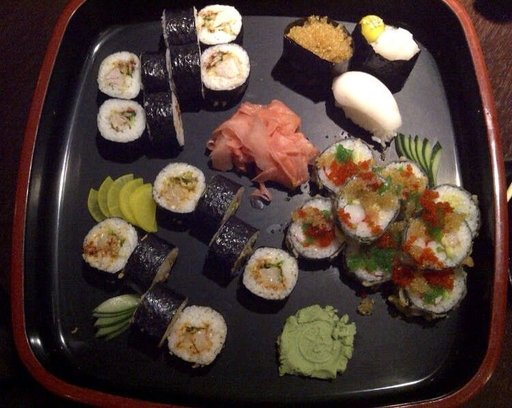

In [77]:
import random
from PIL import Image
random.seed(42)
image_path_list=list(image_path.glob("*/*/*.jpg"))

random_image_path=random.choice(image_path_list)
print(random_image_path)
# * Image class
image_class=random_image_path.parent.stem
print(image_class)
img=Image.open(random_image_path)
print(img.size)
img

(-0.5, 511.5, 407.5, -0.5)

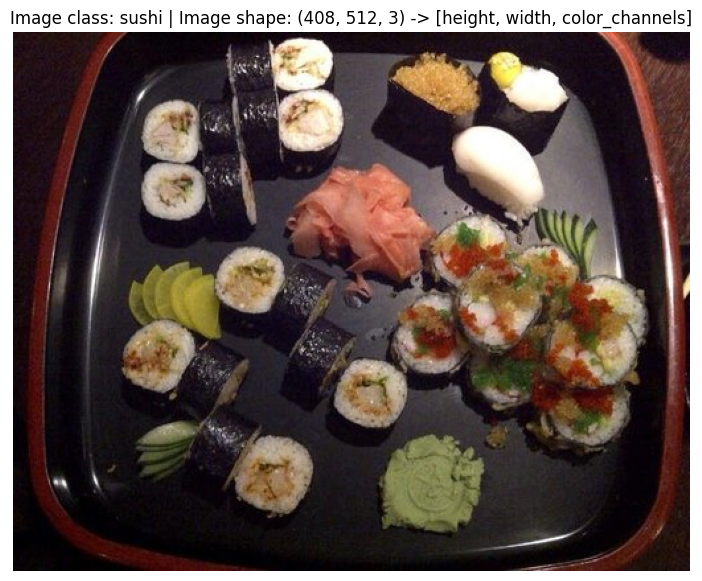

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

## 3 Transforming Data

In [79]:
from torch.utils.data import dataloader
from torchvision import datasets,transforms

### 3.1 Transforming dara transforms 

In [80]:
data_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])

Plotting images

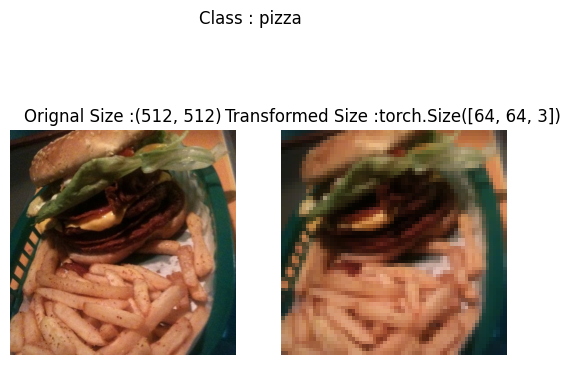

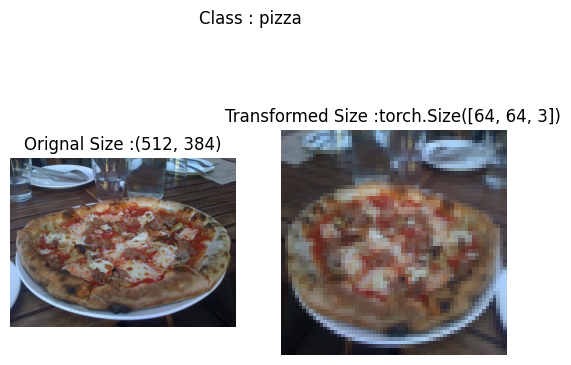

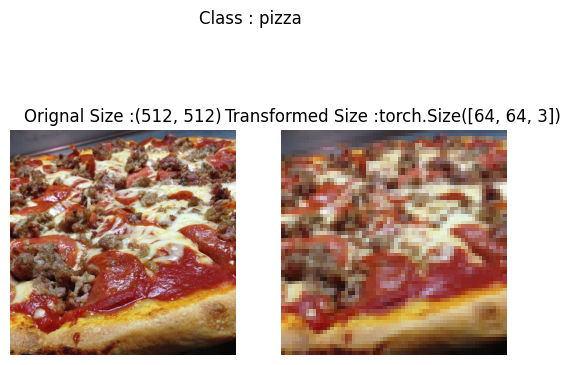

In [81]:
def plot_transflormed_images(image_paths,transform,n=3,seed=None):
    if seed:
        random.seed(seed)
    random_image_path=random.sample(image_paths,k=n)
    for image_path in random_image_path:
        with Image.open(image_path) as f:
            fig,ax=plt.subplots(nrows=1,ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Orignal Size :{f.size}")
            ax[0].axis(False)

            # *transform AND plot target images
            # ~ 012 to 120
            transformed_image=transform(f).permute(1,2,0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed Size :{transformed_image.size()}")
            ax[1].axis(False)
            fig.suptitle(f"Class : {image_path.parent.stem}")
plot_transflormed_images(image_paths=image_path_list,transform=data_transform,n=3,seed=None)


## 4 Option 1 loading image using Image folder

In [82]:

# ! use image folder
from torchvision import datasets
train_data=datasets.ImageFolder(root=train_dir,transform=data_transform,target_transform=None)
test_data=datasets.ImageFolder(root=test_dir,transform=data_transform)
train_data,train_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 225
     Root location: Data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [83]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [84]:
class_dict=train_data.class_to_idx
class_dict,len(train_data),len(test_data)

({'pizza': 0, 'steak': 1, 'sushi': 2}, 225, 75)

In [85]:
train_data.samples[0]

('Data\\pizza_steak_sushi\\train\\pizza\\1008844.jpg', 0)

In [86]:

# ! Indexing on train data
img,label=train_data[0][0],train_data[0][1]
img,img.shape,img.dtype,label,type(label)

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [87]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.09

plotting

Orignal image torch.Size([3, 64, 64])
Image after permute torch.Size([64, 64, 3])


(-0.5, 63.5, 63.5, -0.5)

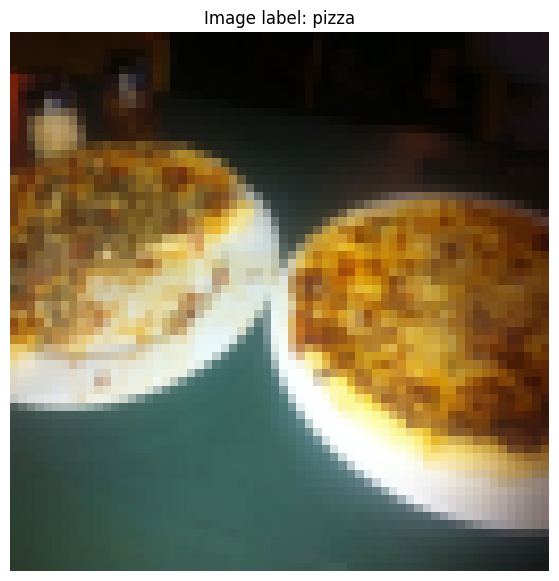

In [88]:

# ! rearrange the ordeer dims
img_permute=img.permute(1,2,0)

print("Orignal image",img.shape)
print("Image after permute",img_permute.shape)

# ! plot the image
plt.figure(figsize=(10,7))
plt.imshow(img_permute)
plt.title(f"Image label: {class_names[label]}")
plt.axis(False)

### 4.1 Converting it into Dataloader

In [89]:

# ! Can be used for any type of data
from torch.utils.data import DataLoader
BATCH_SIZE=1
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,num_workers=os.cpu_count(),shuffle=True)
test_dataloader=DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,num_workers=os.cpu_count(),shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x23168c843e0>,
 <torch.utils.data.dataloader.DataLoader at 0x23158195070>)

In [90]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [91]:
img,label=next(iter(train_dataloader))
print(f"Img shape {img.shape}")
print(f"label shape {label.shape}")


Img shape torch.Size([1, 3, 64, 64])
label shape torch.Size([1])


## 5 Option 2 Loading Image Data with custom Data

In [92]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [93]:

# ! have to create imagefolder functionality
train_data.classes, train_data.class_to_idx


(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## 5.1Creating helper function to get class names

In [94]:

# *setup path for target dir
target_directory=train_dir
print(f"Target dir= {target_directory}")

# *get class names
class_names_found=sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir= Data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [95]:
def find_classes(directory:str):
    classes=sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
    # ~ if class name not find
    if not classes:
        raise FileNotFoundError(f"Cant find any classes in {directory}")
    # ^ Create dict of classs names

    class_to_idx={cls_name: i for i, cls_name in enumerate(classes)}
    return classes,class_to_idx

In [96]:
find_classes(train_dir)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## 5.2 Create custom dataset to replicate ImageFolder

In [97]:

# * 0 write custom datasset class
from torch.utils.data import Dataset

# * 1 Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
    # *2 Initilize custom dataset
    def __init__(self,targ_dir,transform=None):
        # *3 create c;ass attributes
        self.paths=list(pathlib.Path(targ_dir).glob("*/*.jpg"))
        self.transform=transform
        self.classes,self.class_to_idx=find_classes(targ_dir)
    # *4 Create fuction to load image
    def load_image(self,index:int):
        image_path=self.paths[index]
        return Image.open(image_path)
    # *5 override __len__
    def __len__(self):
        return len(self.paths)
    # *6 override __getitem__
    def __getitem__(self, index:int):
        img=self.load_image(index)
        class_names=self.paths[index].parent.name
        #! expects path in data_folder/class_name/image.jpeg
        class_idx=self.class_to_idx[class_names]
        # todo check for transform
        if self.transform:
            return self.transform(img),class_idx
        else:
            return img,class_idx

In [98]:

# todo creatr transform
# Augment train data
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

# Don't augment test data, only reshape
test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [99]:

# ! testing ImageFolderCustom
train_data_custom=ImageFolderCustom(targ_dir=train_dir,transform=train_transforms)
test_data_custom=ImageFolderCustom(targ_dir=test_dir,transform=test_transforms)

In [100]:
len(train_data_custom),len(test_data_custom)

(225, 75)

In [101]:
train_data_custom.classes,train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

checking equality

In [102]:
print(train_data_custom.classes==train_data.classes)
print(test_data_custom==test_data)


True
False


### 5.3 Display random images

In [103]:

#* 1 create function
import torch.utils
import torch.utils.data


def display_random_image(dataset:torch.utils.data.Dataset,classes,n,display_shape=True,seed=None):
    # 2 adjust display shape if n is too high
    if n>10:
        n=10
        display_shape=False
        print(f"N is high it is changed to 10")

    # 3 set seed
    if seed:
        random.seed(42)
        torch.manual_seed(seed)
    # 4 Get random sample index
    random_sample_idx=random.sample(range(len(dataset)),k=n)
    # * 5 Create figure
    plt.figure(figsize=(16,8))
    # * Loop throug random indexes
    for i,targ_sample in enumerate(random_sample_idx):
        targ_image,targ_label=dataset[targ_sample][0],dataset[targ_sample][1]

        #* adjustr dims for plotting
        targ_image_adjust=targ_image.permute(1,2,0)

        # * plotting image
        plt.subplot(1,n,i+1)
        plt.imshow(targ_image_adjust)
        plt.axis(False)
        if classes:
            title=f"Classes: {classes[targ_label]}"
            if display_shape:
                title+=f", \n Shape: {targ_image_adjust.shape}"
        # print(title)
        plt.title(title)



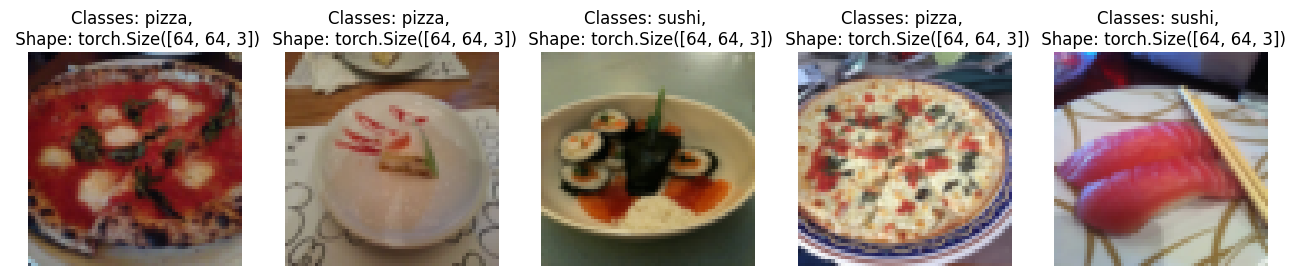

In [104]:
display_random_image(train_data,n=5,classes=class_names,seed=None)

N is high it is changed to 10


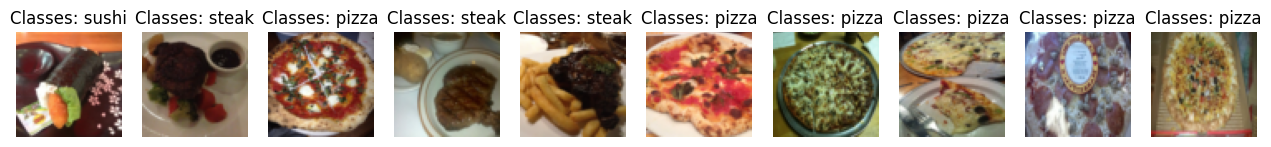

In [105]:
display_random_image(train_data_custom,n=20,classes=class_names,seed=None)

### 5.4 Turning it into data loader

In [106]:
from torch.utils.data import DataLoader

BATCH_SIZE=64
train_dataloader_custom=DataLoader(dataset=train_data_custom,batch_size=BATCH_SIZE,num_workers=0,shuffle=True)
test_dataloader_custom=DataLoader(dataset=test_data_custom,batch_size=BATCH_SIZE,num_workers=0,shuffle=False)
train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x231677f2c30>,
 <torch.utils.data.dataloader.DataLoader at 0x2316913e7e0>)

In [107]:
# Get image and label from custom DataLoader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img_custom.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_custom.shape}")

Image shape: torch.Size([64, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([64])


## 6. Data Augmentation - Image transformation

trivial argument

In [108]:
from torchvision import transforms
train_transforms=transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])
test_transforms=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

In [109]:

# * get all image path
image_path_list=list(image_path.glob("*/*/*.jpg"))
image_path_list

[WindowsPath('Data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('Data/pizza_steak_sushi/test/pizza/309892.jp

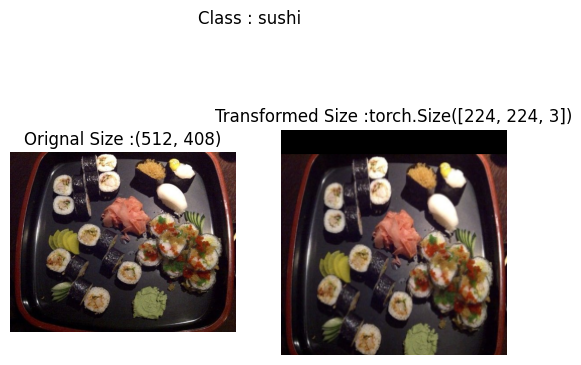

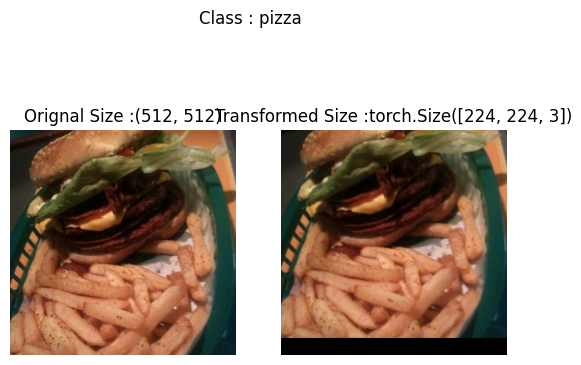

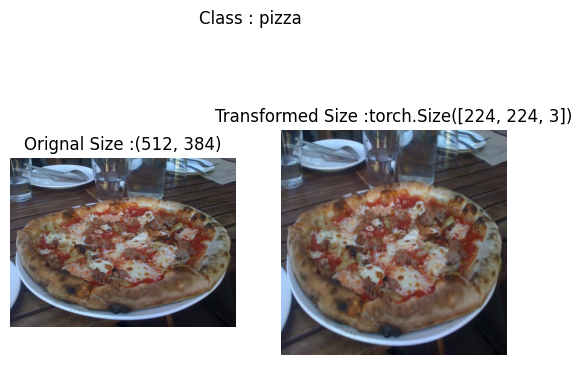

In [110]:

# * Plot transformed images
plot_transflormed_images(image_paths=image_path_list,transform=train_transforms,n=3,seed=42)

## 7. Model 0 . Tiny vgg - Baseline model

### 7.1 transforms and loading data

In [111]:
simple_transform=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

In [112]:

# * 1 load and transform data
train_data_simple=datasets.ImageFolder(root=train_dir,transform=simple_transform)
test_data_simple=datasets.ImageFolder(root=test_dir,transform=simple_transform)

# * 2 turning into dataloaders
import os
from torch.utils.data import DataLoader

BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()

# *Data loaders
train_dataloader_simple=DataLoader(dataset=train_data_simple,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=True)

test_dataloader_simple=DataLoader(dataset=test_data_simple,batch_size=BATCH_SIZE,num_workers=NUM_WORKERS,shuffle=False)

### 7. tiny vgg model

In [113]:
class TinyVgg(nn.Module):
    def __init__(self, input_shape,hidden_units,output_shape):
        super().__init__()
        self.conv_block_1=nn.Sequential(
            nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,
                      kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2=nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,padding=1,stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,stride=2)
        )
        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*16*16, output_shape)
        )
    
    def forward(self, x):
        x=self.conv_block_1(x)
        x=self.conv_block_2(x)
        x=self.classifier(x)
        return x

In [114]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_0=TinyVgg(input_shape=3,hidden_units=10,output_shape=len(class_names)).to(device)
model_0


TinyVgg(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

### 7.3trying forward pass on single image

In [115]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader_simple))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0578, 0.0634, 0.0351]], device='cuda:0')

Output prediction probabilities:
tensor([[0.3352, 0.3371, 0.3277]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
2


### 7.4 get shapes of our model

In [116]:
from torchinfo import summary
summary(model_0,input_size=[1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVgg                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

### 7.5 Training and test step

In [117]:

# ^ train set
def train_step(model,dataloader,loss_fn,optimizer):
    model.train()
    train_loss,train_acc=0,0
    for batch,(X,y) in enumerate(dataloader):
        X,y=X.to(device),y.to(device)
        # * Forward pass
        y_pred=model(X)
        # * Calculate loss
        loss=loss_fn(y_pred,y)
        train_loss+=loss.item()
        # * Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
        #* Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    #* Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [118]:


# ^ test set

def test_step(model,dataloader,loss_fn):
    model.eval()
    test_loss, test_acc=0,0
    with torch.inference_mode():
        # *loop
        for batch,(X,y) in enumerate(dataloader):
            X,y=X.to(device),y.to(device)
            # * Forward pass
            test_pred_logits=model(X)
            # * Calculate loss
            loss=loss_fn(test_pred_logits,y)
            test_loss+=loss.item()
            # * Calculate and accumulate accuracy metric across all batches
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    #* Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

### 7.6 Creating a function that takes both train and test step

In [119]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,dataloader=train_dataloader,loss_fn=loss_fn,                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,dataloader=test_dataloader,loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### 7.7 train and evaluate our model

In [120]:

torch.manual_seed(42)
torch.cuda.manual_seed(42)
NUM_EPOCHS=5

# * Create a new model

model_0=TinyVgg(input_shape=3,hidden_units=10,output_shape=len(class_names)).to(device)

# ~ Create optimizers and loss function

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.001)

# * Train and evaluate
from timeit import default_timer as timer
start_time=timer()
results_0 = train(model=model_0, 
              train_dataloader=train_dataloader_simple, 
              test_dataloader=test_dataloader_simple, 
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=NUM_EPOCHS)
end_time=timer()

print(f"Training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:19<01:16, 19.16s/it]

Epoch: 1 | train_loss: 1.1078 | train_acc: 0.2578 | test_loss: 1.1362 | test_acc: 0.2604


 40%|████      | 2/5 [00:37<00:56, 18.78s/it]

Epoch: 2 | train_loss: 1.0846 | train_acc: 0.4258 | test_loss: 1.1622 | test_acc: 0.1979


 60%|██████    | 3/5 [00:56<00:37, 18.74s/it]

Epoch: 3 | train_loss: 1.1147 | train_acc: 0.2930 | test_loss: 1.1684 | test_acc: 0.1979


 80%|████████  | 4/5 [01:14<00:18, 18.62s/it]

Epoch: 4 | train_loss: 1.1013 | train_acc: 0.3125 | test_loss: 1.1319 | test_acc: 0.2604


100%|██████████| 5/5 [01:34<00:00, 18.81s/it]

Epoch: 5 | train_loss: 1.0979 | train_acc: 0.2930 | test_loss: 1.1443 | test_acc: 0.1979
Training time: 94.035 seconds


In [121]:
results_0

{'train_loss': [1.1078356057405472,
  1.0846370086073875,
  1.1146710366010666,
  1.1013339310884476,
  1.097860187292099],
 'train_acc': [0.2578125, 0.42578125, 0.29296875, 0.3125, 0.29296875],
 'test_loss': [1.1362200578053792,
  1.1622019211451213,
  1.1683884064356487,
  1.1319317817687988,
  1.144309401512146],
 'test_acc': [0.2604166666666667,
  0.19791666666666666,
  0.19791666666666666,
  0.2604166666666667,
  0.19791666666666666]}

### 7.8 plot loss curves of your model

In [123]:
def plot_loss_curves(results):
    #* Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # * Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

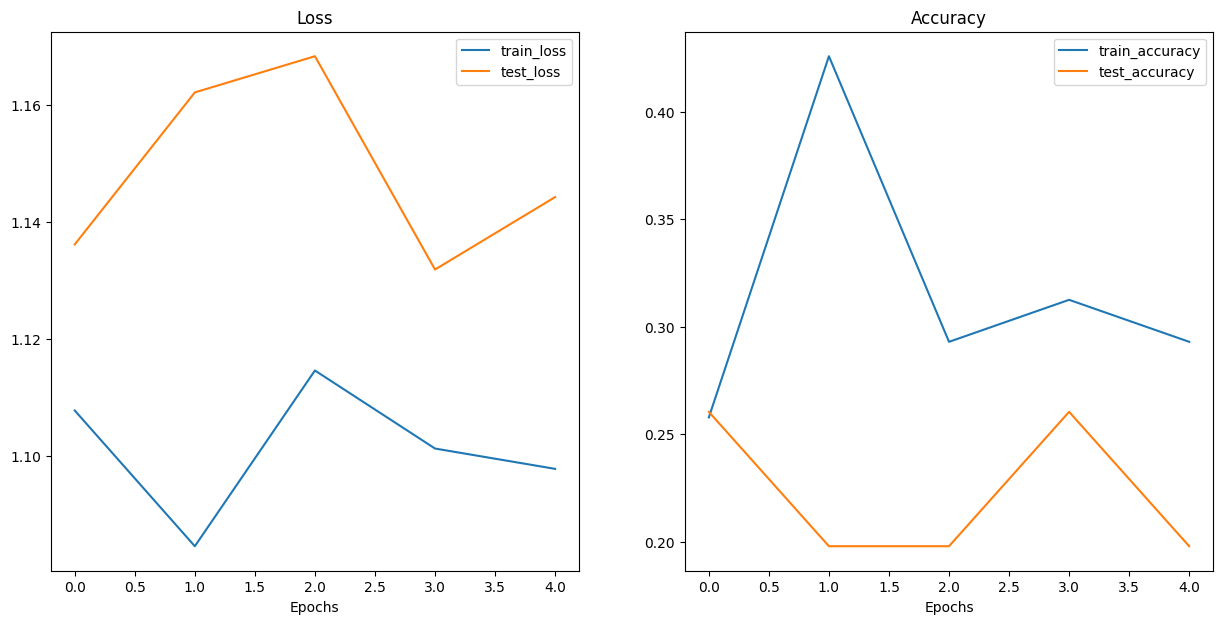

In [124]:
plot_loss_curves(results_0)

## 9 model 1 tiny vgg with data augmentation

In [125]:
# Create training transform with TrivialAugment
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor() 
])

# Create testing transform (no data augmentation)
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [127]:
# Turn image folders into Datasets
train_data_augmented = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transform)

train_data_augmented, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: Data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: Data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [128]:
# Turn Datasets into DataLoader's
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented, 
                                        batch_size=BATCH_SIZE, 
                                        shuffle=True,
                                        num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_augmented, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x2318f192660>,
 <torch.utils.data.dataloader.DataLoader at 0x23158195070>)

In [130]:
# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVgg(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1

TinyVgg(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [131]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_1
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader_augmented,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

 20%|██        | 1/5 [00:23<01:33, 23.49s/it]

Epoch: 1 | train_loss: 1.1074 | train_acc: 0.2500 | test_loss: 1.1059 | test_acc: 0.2604


 40%|████      | 2/5 [00:44<01:05, 21.75s/it]

Epoch: 2 | train_loss: 1.0790 | train_acc: 0.4258 | test_loss: 1.1383 | test_acc: 0.2604


 60%|██████    | 3/5 [01:03<00:41, 20.89s/it]

Epoch: 3 | train_loss: 1.0801 | train_acc: 0.4258 | test_loss: 1.1695 | test_acc: 0.2604


 80%|████████  | 4/5 [01:22<00:19, 19.84s/it]

Epoch: 4 | train_loss: 1.1286 | train_acc: 0.3047 | test_loss: 1.1620 | test_acc: 0.2604


100%|██████████| 5/5 [01:41<00:00, 20.28s/it]

Epoch: 5 | train_loss: 1.0885 | train_acc: 0.4258 | test_loss: 1.1476 | test_acc: 0.2604
Total training time: 101.401 seconds


plotting

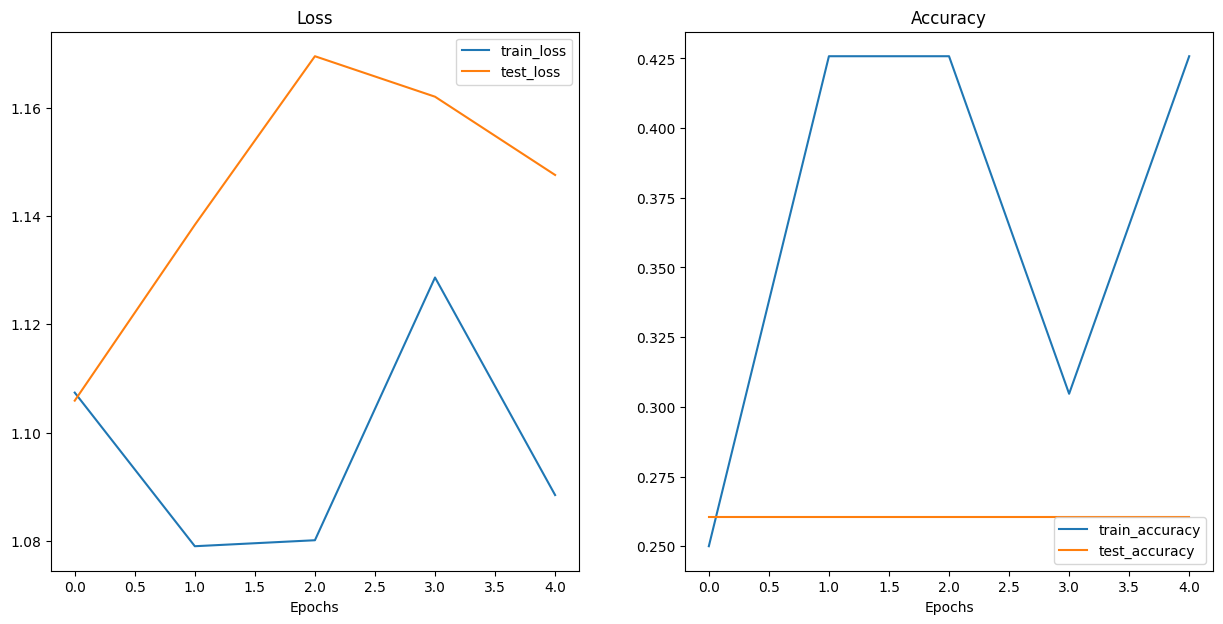

In [132]:
plot_loss_curves(model_1_results)


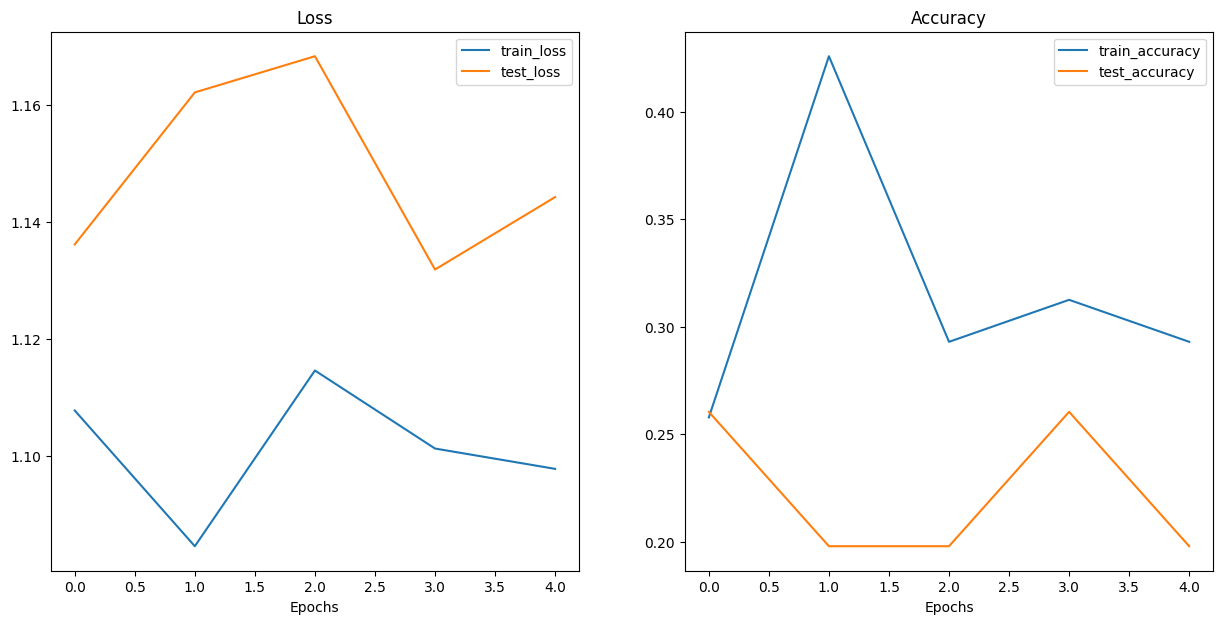

In [133]:
plot_loss_curves(results_0)

## 10 Comparing our models

In [135]:
import pandas as pd
model_0_df=pd.DataFrame(results_0)
model_1_df=pd.DataFrame(model_1_results)

comparison_df=pd.concat([model_0_df,model_1_df],axis=1)

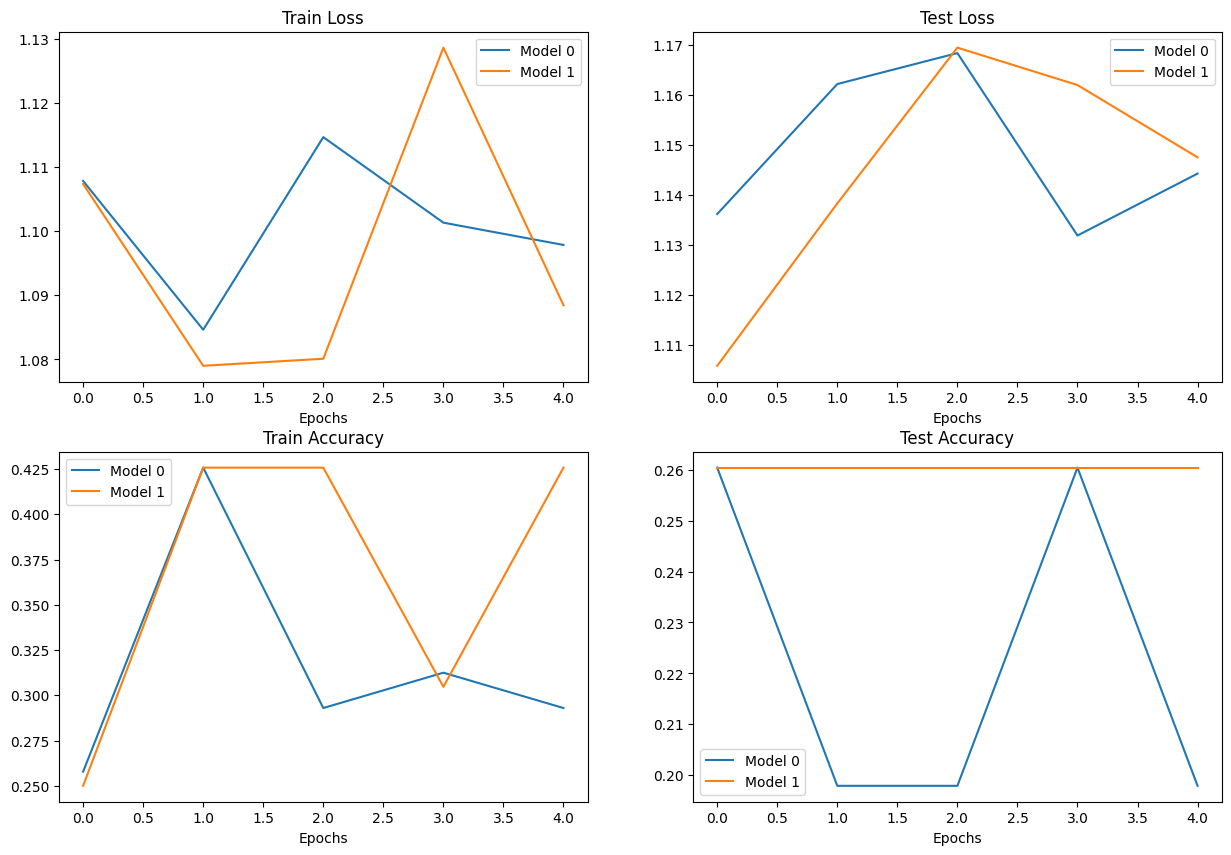

In [136]:
plt.figure(figsize=(15,10))

# Get number of epochs
epochs = range(len(model_0_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="Model 0")
plt.plot(epochs, model_1_df["train_loss"], label="Model 1")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="Model 0")
plt.plot(epochs, model_1_df["test_loss"], label="Model 1")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="Model 0")
plt.plot(epochs, model_1_df["train_acc"], label="Model 1")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="Model 0")
plt.plot(epochs, model_1_df["test_acc"], label="Model 1")
plt.title("Test Accuracy")
plt.xlabel("Epochs")
plt.legend()

## 11 Making prediction on custom image

In [139]:

# ! Download image
import requests
custom_image_path=data_path/"04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

Data\04-pizza-dad.jpeg already exists, skipping download.


(tensor([[[154, 173, 181,  ...,  21,  18,  14],
          [146, 165, 181,  ...,  21,  18,  15],
          [124, 146, 172,  ...,  18,  17,  15],
          ...,
          [ 72,  59,  45,  ..., 152, 150, 148],
          [ 64,  55,  41,  ..., 150, 147, 144],
          [ 64,  60,  46,  ..., 149, 146, 143]],
 
         [[171, 190, 193,  ...,  22,  19,  15],
          [163, 182, 193,  ...,  22,  19,  16],
          [141, 163, 184,  ...,  19,  18,  16],
          ...,
          [ 55,  42,  28,  ..., 107, 104, 103],
          [ 47,  38,  24,  ..., 108, 104, 102],
          [ 47,  43,  29,  ..., 107, 104, 101]],
 
         [[119, 138, 147,  ...,  17,  14,  10],
          [111, 130, 145,  ...,  17,  14,  11],
          [ 87, 111, 136,  ...,  14,  13,  11],
          ...,
          [ 35,  22,   8,  ...,  52,  52,  48],
          [ 27,  18,   4,  ...,  50,  49,  44],
          [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8),
 <matplotlib.image.AxesImage at 0x23190352960>)

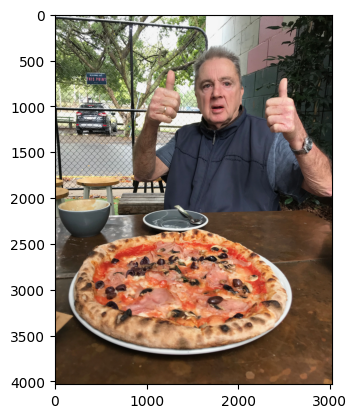

In [141]:
import torchvision

custom_image_unit8=torchvision.io.read_image(str(custom_image_path))
custom_image_unit8,plt.imshow(custom_image_unit8.permute(1,2,0))

### 11.3 making prediction

In [142]:
# model_1.eval()
# !showw type error
# # Normalize the image
# with torch.inference_mode():
#     model_1(custom_image_unit8).to(device)

RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [143]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

### 11.2 predicting on that custom image

In [144]:
# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 

# Print out image data
print(f"Custom image tensor:\n{custom_image}\n")
print(f"Custom image shape: {custom_image.shape}\n")
print(f"Custom image dtype: {custom_image.dtype}")

Custom image tensor:
tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.3412, 0.4353, 0.5333,  ..

(-0.5, 3023.5, 4031.5, -0.5)

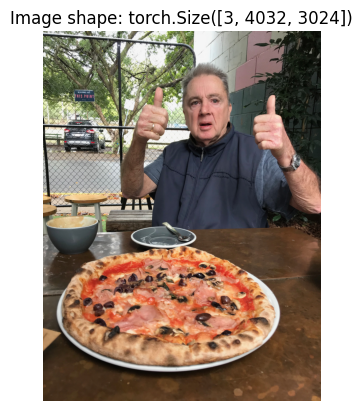

In [146]:

#* plotting image
# Plot custom image
plt.imshow(custom_image.permute(1, 2, 0)) # need to permute image dimensions from CHW -> HWC otherwise matplotlib will error
plt.title(f"Image shape: {custom_image.shape}")
plt.axis(False)

In [147]:
# Create transform pipleine to resize image
custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

# Print out original shape and new shape
print(f"Original shape: {custom_image.shape}")
print(f"New shape: {custom_image_transformed.shape}")

Original shape: torch.Size([3, 4032, 3024])
New shape: torch.Size([3, 64, 64])


In [149]:
# model_1.eval()
# # ! device error
# with torch.inference_mode():
#     custom_image_pred = model_1(custom_image_transformed)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument weight in method wrapper_CUDA___slow_conv2d_forward)

In [151]:
model_1.eval()
# ! SHAPE ERROR
with torch.inference_mode():
    custom_image_pred = model_1(custom_image_transformed.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x256 and 2560x3)

In [152]:
model_1.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_1(custom_image_transformed.unsqueeze(dim=0).to(device))

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])


In [153]:
custom_image_pred


tensor([[ 0.1184,  0.0267, -0.1453]], device='cuda:0')

In [154]:
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")

Prediction logits: tensor([[ 0.1184,  0.0267, -0.1453]], device='cuda:0')
Prediction probabilities: tensor([[0.3731, 0.3404, 0.2866]], device='cuda:0')
Prediction label: tensor([0], device='cuda:0')


In [155]:
# Find the predicted label
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
custom_image_pred_class


'pizza'

In [156]:
# The values of the prediction probabilities are quite similar
custom_image_pred_probs

tensor([[0.3731, 0.3404, 0.2866]], device='cuda:0')

### 11.3 building a function

In [157]:
def pred_and_plot_image(model: torch.nn.Module, 
                        image_path: str, 
                        class_names: List[str] = None, 
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""
    
    # 1. Load in image and convert the tensor values to float32
    target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)
    
    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    target_image = target_image / 255. 
    
    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)
    
    # 4. Make sure the model is on the target device
    model.to(device)
    
    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)
    
        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))
        
    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)
    
    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else: 
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False)

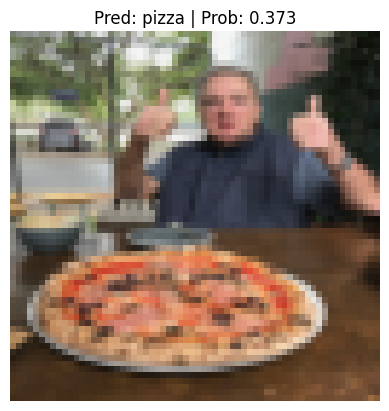

In [158]:
# Pred on our custom image
pred_and_plot_image(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    transform=custom_image_transform,
                    device=device)